In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A_train = np.loadtxt('classificationA.train')
A_test = np.loadtxt('classificationA.test')
B_train = np.loadtxt('classificationB.train')
B_test = np.loadtxt('classificationB.test')
C_train = np.loadtxt('classificationC.train')
C_test = np.loadtxt('classificationC.test')

### Generative model (Fisher LDA)

In [3]:
def fisher_LDA_train(x, y):
    # size and dimension of feature matrix
    n = np.size(x, axis=0)
    d = np.size(x, axis=1)
    
    π_MLE = np.sum(y) / n
    
    μ1_MLE = np.sum(y * x.T, axis=1) / np.sum(y)
    μ0_MLE = np.sum((1-y) * x.T, axis=1) / np.sum(1-y)
    
    μ_diff = μ1_MLE - μ0_MLE
    
    x_minus_μ1 = x - μ1_MLE
    x_minus_μ0 = x - μ0_MLE
    
    Σ_MLE = np.zeros(d*d)
    for i in range(n):
        Σ_MLE += y[i] * np.kron(x_minus_μ1[i], x_minus_μ1[i])
        Σ_MLE += (1-y[i]) * np.kron(x_minus_μ0[i], x_minus_μ0[i])
    Σ_MLE = (Σ_MLE / n).reshape((d,d))
    
    Σ_inverse = np.linalg.pinv(Σ_MLE)
    
    β = Σ_inverse @ μ_diff
    γ = -1/2 * np.matmul(μ_diff, np.matmul(Σ_inverse, μ1_MLE + μ0_MLE)) + np.log(π_MLE / (1 - π_MLE))
    
    return β, γ

In [4]:
def fisher_LDA_plot(x, y, β, γ, dataset_label):
    x1_min = np.min(x[:,0])
    x1_max = np.max(x[:,0])
    x1 = np.linspace(x1_min, x1_max, np.size(y))
    plt.plot(x1, -(γ + β[0]*x1) / β[1])
    plt.scatter(x[:,0], x[:,1], c=y)
    
    plt.ylim(np.min(x[:,1]) - 1, np.max(x[:,1]) + 1)
    
    plt.title('Fisher LDA, dataset ' + str(dataset_label))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [5]:
def fisher_LDA_train_and_plot(train_data, dataset_label):
    β, γ = fisher_LDA_train(train_data[:,:2], train_data[:,2])
    fisher_LDA_plot(train_data[:,:2], train_data[:,2], β, γ, dataset_label)

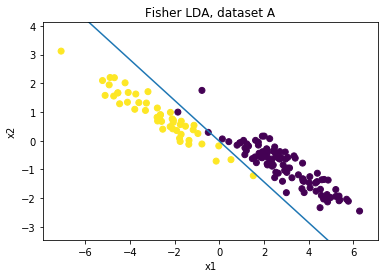

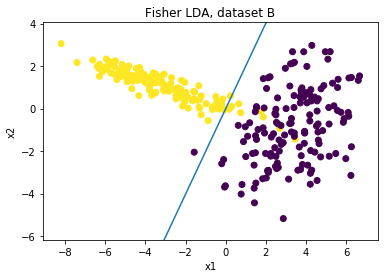

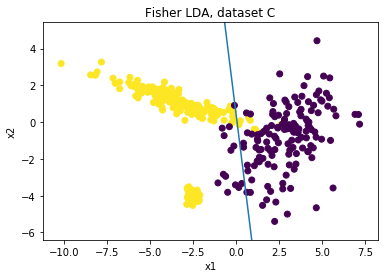

In [6]:
fisher_LDA_train_and_plot(A_train, 'A')
fisher_LDA_train_and_plot(B_train, 'B')
fisher_LDA_train_and_plot(C_train, 'C')

### Logistic regression

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def log_reg_train(x, y):
    # size and dimension of feature matrix
    n = np.size(x, axis=0)
    d = np.size(x, axis=1)
    
    # design matrix
    X = np.ndarray((n,d+1))
    X[:,0] = np.ones(n)
    X[:,1:] = x
    
    # initializing weights at zero
    w = np.zeros(d+1)
    update = np.ones((d+1,1))
    
    α = 1
    τ = .9
    ϵ = 1/100
    
    while any(np.absolute(update) > ϵ):
        σ_wX = sigmoid(w @ X.T)
        l_prime = X.T.dot(y - σ_wX)     # l'(w) = X.T * (y - σ(w.T*X.T))
        D = np.diag(σ_wX * (1 - σ_wX))  # D(w)  = σ(w.T*X.T) * (1 - σ(w.T*X.T))
        H = -1 * np.matmul(X.T, D @ X)  # H(w)  = -1 * (X.T * D * X)
        H_inv = np.linalg.pinv(H)
        update = α *(H_inv @ l_prime)
        w -= update
        α = τ * α
    
    return w[1:], w[0]  # w, b

In [9]:
def log_reg_plot(x, y, w, b, dataset_label):
    x1_min = np.min(x[:,0])
    x1_max = np.max(x[:,0])
    x1 = np.linspace(x1_min, x1_max, np.size(y)) 
    plt.plot(x1, -(b + w[0]*x1) / w[1])
    plt.scatter(x[:,0], x[:,1], c=y)
    
    plt.ylim(np.min(x[:,1]) - 1, np.max(x[:,1]) + 1)
    
    plt.title('Logistic Regression, dataset ' + str(dataset_label))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [10]:
def log_reg_train_and_plot(train_data, dataset_label):
    w, b = log_reg_train(train_data[:,:2], train_data[:,2])
    log_reg_plot(train_data[:,:2], train_data[:,2], w, b, dataset_label)
    print('w = ' + str(w))
    print('b = ' + str(b))

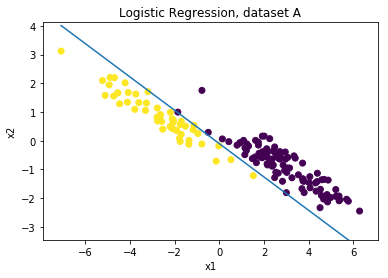

w = [ -70.44635005 -121.47701019]
b = -12.181212379166821


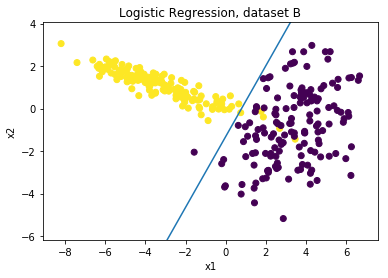

w = [-1.69157937  1.01449797]
b = 1.3315483289794985


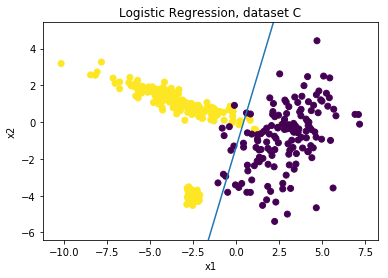

w = [-2.18688983  0.69856151]
b = 0.9468789174940152


In [11]:
log_reg_train_and_plot(A_train, 'A')
log_reg_train_and_plot(B_train, 'B')
log_reg_train_and_plot(C_train, 'C')

### Linear regression

In [12]:
def lin_reg_train(x, y):
    # size and dimension of feature matrix
    n = np.size(x, axis=0)
    d = np.size(x, axis=1)
    
    # design matrix
    X = np.ndarray((n,d+1))
    X[:,:d] = x
    X[:,d] = np.ones(n)
    
    w = np.matmul(np.linalg.inv(X.T @ X), (X.T @ y))
    
    diff = y - w.T @ X.T
    σ2 = np.sum(diff @ diff.T, axis=0) / n
    
    return w[:2], w[2], σ2  # w, b, σ2

In [13]:
def lin_reg_plot(x, y, w, b, dataset_label):
    x1_min = np.min(x[:,0])
    x1_max = np.max(x[:,0])
    x1 = np.linspace(x1_min, x1_max, np.size(y))
    plt.plot(x1, (1/2 - b - w[0]*x1) / w[1])
    plt.scatter(x[:,0], x[:,1], c=y)
    
    plt.ylim(np.min(x[:,1]) - 1, np.max(x[:,1]) + 1)
    
    plt.title('Linear Regression, dataset ' + str(dataset_label))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [14]:
def lin_reg_train_and_plot(train_data, dataset_label):
    w, b, σ2 = lin_reg_train(train_data[:,:2], train_data[:,2])
    lin_reg_plot(train_data[:,:2], train_data[:,2], w, b, dataset_label)
    print('w = ' + str(w))
    print('b = ' + str(b))
    print('σ2 = ' + str(σ2))

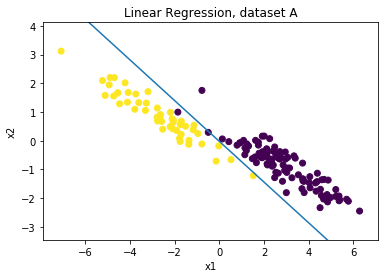

w = [-0.2640075  -0.37259311]
b = 0.4922920375647635
σ2 = 0.039865517973029736


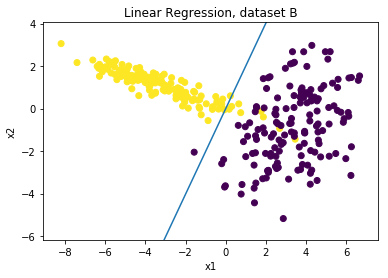

w = [-0.10424575  0.05179118]
b = 0.500050426999757
σ2 = 0.054264082689522514


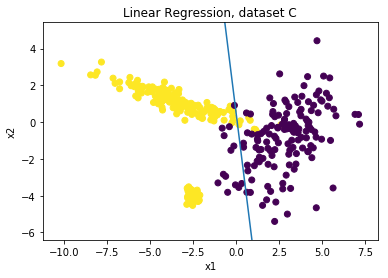

w = [-0.12769333 -0.01700142]
b = 0.508399815826349
σ2 = 0.062249980937486474


In [15]:
lin_reg_train_and_plot(A_train, 'A')
lin_reg_train_and_plot(B_train, 'B')
lin_reg_train_and_plot(C_train, 'C')

### Model testing on the datasets

In [16]:
def fisher_LDA_test(train_data, test_data):
    β, γ = fisher_LDA_train(train_data[:,:2], train_data[:,2])
    predictions = np.sign(1 + np.sign(β.T @ test_data[:,:2].T + γ))
    success_rate = np.sum(test_data[:,2] == predictions) / np.size(predictions)
    return success_rate

In [17]:
def log_reg_test(train_data, test_data):
    w, b = log_reg_train(train_data[:,:2], train_data[:,2])
    predictions = np.sign(1 + np.sign(w.T @ test_data[:,:2].T + b))
    success_rate = np.sum(test_data[:,2] == predictions) / np.size(predictions)
    return success_rate

In [18]:
def lin_reg_test(train_data, test_data):
    w, b, σ2 = lin_reg_train(train_data[:,:2], train_data[:,2])
    predictions = np.sign(1 + np.sign(w.T @ test_data[:,:2].T + b - 1/2))
    success_rate = np.sum(test_data[:,2] == predictions) / np.size(predictions)
    return success_rate

In [19]:
def get_class_err(test_function, train_data, test_data, desc):
    return (1 - test_function(train_data, test_data)) * 100

In [20]:
test_funct = [fisher_LDA_test, log_reg_test, lin_reg_test]
funct_desc = ['Fisher LDA:', 'Logistic Regression:', 'Linear Regression:']

train_data = [A_train, A_train, B_train, B_train, C_train,C_train]
test_data = [A_train, A_test, B_train, B_test, C_train, C_test]
desc = ['A_train: ', 'A_test:  ', 'B_train: ', 'B_test:  ', 'C_train: ', 'C_test:  ']

print('Classification error:')
for i in range(len(test_funct)):
    print('\n' + str(funct_desc[i]))
    for j in range(len(train_data)):
        print(desc[j] + "{0:.2f}".format(get_class_err(test_funct[i], train_data[j], test_data[j], desc[j])) + ' %')

Classification error:

Fisher LDA:
A_train: 1.33 %
A_test:  2.00 %
B_train: 3.00 %
B_test:  4.15 %
C_train: 5.50 %
C_test:  4.23 %

Logistic Regression:
A_train: 0.00 %
A_test:  3.47 %
B_train: 2.00 %
B_test:  4.35 %
C_train: 4.00 %
C_test:  2.27 %

Linear Regression:
A_train: 1.33 %
A_test:  2.07 %
B_train: 3.00 %
B_test:  4.15 %
C_train: 5.50 %
C_test:  4.23 %


### QDA Model

In [21]:
def QDA_train(x, y):
    # size and dimension of feature matrix
    n = np.size(x, axis=0)
    d = np.size(x, axis=1)
    
    π_MLE = np.sum(y) / n
    
    μ1_MLE = np.sum(y * x.T, axis=1) / np.sum(y)
    μ0_MLE = np.sum((1-y) * x.T, axis=1) / np.sum(1-y)
    
    μ_diff = μ1_MLE - μ0_MLE
    
    x_minus_μ1 = x - μ1_MLE
    x_minus_μ0 = x - μ0_MLE
    
    Σ1_MLE = np.zeros(d*d)
    Σ0_MLE = np.zeros(d*d)
    for i in range(n):
        Σ1_MLE += y[i] * np.kron(x_minus_μ1[i], x_minus_μ1[i])
        Σ0_MLE += (1-y[i]) * np.kron(x_minus_μ0[i], x_minus_μ0[i])
    Σ1_MLE = (Σ1_MLE / np.sum(y)).reshape((d,d))
    Σ0_MLE = (Σ0_MLE / np.sum(1-y)).reshape((d,d))
    
    Σ1_inverse = np.linalg.pinv(Σ1_MLE)
    Σ0_inverse = np.linalg.pinv(Σ0_MLE)
    
    α = -1/2 * (Σ1_inverse - Σ0_inverse)
    β = μ1_MLE @ Σ1_inverse - μ0_MLE @ Σ0_inverse
    γ = -1/2 * (np.matmul(μ1_MLE, Σ1_inverse @ μ1_MLE) - np.matmul(μ0_MLE, Σ0_inverse @ μ0_MLE)
                - np.log(np.linalg.det(Σ1_MLE)) + np.log(np.linalg.det(Σ0_MLE))) + np.log(π_MLE / (1 - π_MLE))
    
    return π_MLE, μ1_MLE, μ0_MLE, Σ1_MLE, Σ0_MLE, α, β, γ

In [22]:
def QDA_plot(x, y, α, β, γ, dataset_label):
    x1_min = np.min(x[:,0])
    x1_max = np.max(x[:,0])
    x1 = np.linspace(x1_min, x1_max, np.size(y))
    
    a = α[1,1]
    b = ((α[1,0]+α[0,1])*x1 + β[1])
    c = α[0,0]*x1*x1 + β[0]*x1 + γ
    x2 = [(-b + (b*b - 4*a*c)**(1/2)) / (2*a),
          (-b - (b*b - 4*a*c)**(1/2)) / (2*a)]
    
    plt.plot(x1, x2[0])  # first part of discriminant function
    plt.plot(x1, x2[1])  # second part of discriminant function
    
    plt.scatter(x[:,0], x[:,1], c=y)  ## the data points
    
    plt.ylim(np.min(x[:,1]) - 1, np.max(x[:,1]) + 1)
    
    plt.title('QDA, dataset ' + str(dataset_label))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [23]:
def QDA_train_and_plot(train_data, dataset_label):
    π_MLE, μ1_MLE, μ0_MLE, Σ1_MLE, Σ0_MLE, α, β, γ = QDA_train(train_data[:,:2], train_data[:,2])
    print('π = ' + str(π_MLE))
    print('μ1 = ' + str(μ1_MLE))
    print('μ0 = ' + str(μ0_MLE))
    print('Σ1 =\n' + str(Σ1_MLE))
    print('Σ0 =\n' + str(Σ0_MLE))
    print('α =\n' + str(α))
    print('β =\n' + str(β))
    print('γ =\n' + str(γ))
    
    QDA_plot(train_data[:,:2], train_data[:,2], α, β, γ, dataset_label)

π = 0.3333333333333333
μ1 = [-2.69232004  0.866042  ]
μ0 = [ 2.89970947 -0.893874  ]
Σ1 =
[[ 2.70442172 -1.3008515 ]
 [-1.3008515   0.68969588]]
Σ0 =
[[ 2.31065259 -1.04748461]
 [-1.04748461  0.57578403]]
α =
[[-0.7587202  -1.51361485]
 [-1.51361485 -2.86166338]]
β =
[ -7.36527314 -10.87335416]
γ =
-0.9248510714642001


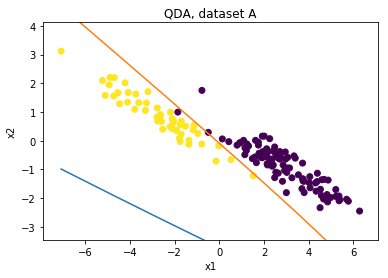

π = 0.5
μ1 = [-3.21670734  1.08306733]
μ0 = [ 3.34068896 -0.83546333]
Σ1 =
[[ 4.15361075 -1.33454097]
 [-1.33454097  0.51607059]]
Σ0 =
[[2.53885859 1.0642112 ]
 [1.0642112  2.96007891]]
α =
[[-0.47982628 -1.92382528]
 [-1.92382528 -5.52933507]]
β =
[-2.28065009  1.45700199]
γ =
0.49834005691341376


/home/francis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/francis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


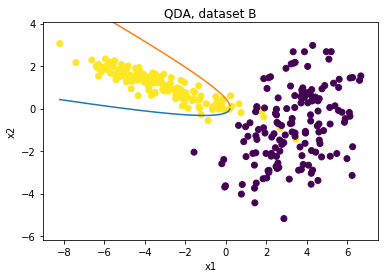

π = 0.625
μ1 = [-2.94232885 -0.9578284 ]
μ0 = [ 2.79304824 -0.83838667]
Σ1 =
[[ 2.86914403 -1.76197061]
 [-1.76197061  6.56438626]]
Σ0 =
[[2.89913927 1.24581553]
 [1.24581553 2.92475448]]
α =
[[ 0.00244301 -0.14592984]
 [-0.14592984  0.11805533]]
β =
[-2.66524064  0.34888942]
γ =
0.9301311520217311


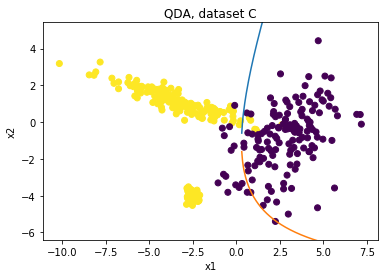

In [24]:
QDA_train_and_plot(A_train, 'A')
QDA_train_and_plot(B_train, 'B')
QDA_train_and_plot(C_train, 'C')

In [25]:
def QDA_test(train_data, test_data):
    x = test_data[:,:2]
    y = test_data[:,2]
    
    π, μ1, μ0, Σ1, Σ0, α, β, γ = QDA_train(train_data[:,:2], train_data[:,2])
    
    predictions = np.sign(1 + np.sign(np.matmul(x, α @ x.T) + β @ x.T + γ))
    success_rate = np.sum(test_data[:,2] == predictions) / np.size(predictions)
    
    return success_rate

In [26]:
for j in range(len(train_data)):
    print(desc[j] + "{0:.2f}".format(get_class_err(QDA_test, train_data[j], test_data[j], desc[j])) + ' %')

A_train: 0.73 %
A_test:  2.02 %
B_train: 11.94 %
B_test:  12.94 %
C_train: 4.62 %
C_test:  3.37 %
